In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import geopandas

In [2]:
plt.style.use('ggplot')
pd.options.display.max_columns=100

In [3]:
df=pd.read_csv('2015_Street_Tree_Census_-_Tree_Data.csv')

In [4]:
zips=geopandas.read_file(r'C:\Users\berid\python სავარჯიშოები\geopandas\tl_2019_us_zcta510\tl_2019_us_zcta510.shp')

In [5]:
df

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.4260,39.0,165.0,3025654.0,3.010850e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,217978,08/18/2015,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,32 MARCY AVENUE,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK73,North Side-South Side,3051900,New York,40.713211,-73.954944,9.967407e+05,199121.6363,34.0,519.0,3062513.0,3.023690e+09
683784,183795,348185,08/29/2015,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,67-035 SELFRIDGE STREET,11375,Forest Hills,406,4,Queens,29,28,15,QN17,Forest Hills,4070700,New York,40.715194,-73.856650,1.023989e+06,199873.6475,29.0,707.0,4075448.0,4.031810e+09
683785,166161,401670,08/22/2015,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,130 BIDWELL AVENUE,10314,Staten Island,501,5,Staten Island,50,63,24,SI07,Westerleigh,5020100,New York,40.620762,-74.136517,9.463514e+05,165466.0763,50.0,201.0,5011657.0,5.004080e+09
683786,184028,504204,08/29/2015,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,1985 ANTHONY AVENUE,10457,Bronx,205,2,Bronx,15,86,33,BX41,Mount Hope,2023502,New York,40.850828,-73.903115,1.011054e+06,249271.9507,15.0,23502.0,2007757.0,2.028120e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tree_id           683788 non-null  int64  
 1   block_id          683788 non-null  int64  
 2   created_at        683788 non-null  object 
 3   tree_dbh          683788 non-null  int64  
 4   stump_diam        683788 non-null  int64  
 5   curb_loc          683788 non-null  object 
 6   status            683788 non-null  object 
 7   health            652172 non-null  object 
 8   spc_latin         652169 non-null  object 
 9   spc_common        652169 non-null  object 
 10  steward           652173 non-null  object 
 11  guards            652172 non-null  object 
 12  sidewalk          652172 non-null  object 
 13  user_type         683788 non-null  object 
 14  problems          652124 non-null  object 
 15  root_stone        683788 non-null  object 
 16  root_grate        68

In [7]:
df['created_at']=pd.to_datetime(df['created_at'])
df=df.drop(['spc_latin','address','nta','nta_name'],axis=1,errors='ignore')
df['postcode']=df['postcode'].astype(str)

In [8]:
for col in df.select_dtypes('object').columns:
    print(f'{col}:{df[col].nunique()}')

curb_loc:2
status:3
health:3
spc_common:132
steward:4
guards:4
sidewalk:2
user_type:3
problems:232
root_stone:2
root_grate:2
root_other:2
trunk_wire:2
trnk_light:2
trnk_other:2
brch_light:2
brch_shoe:2
brch_other:2
postcode:191
zip_city:48
borough:5
state:1


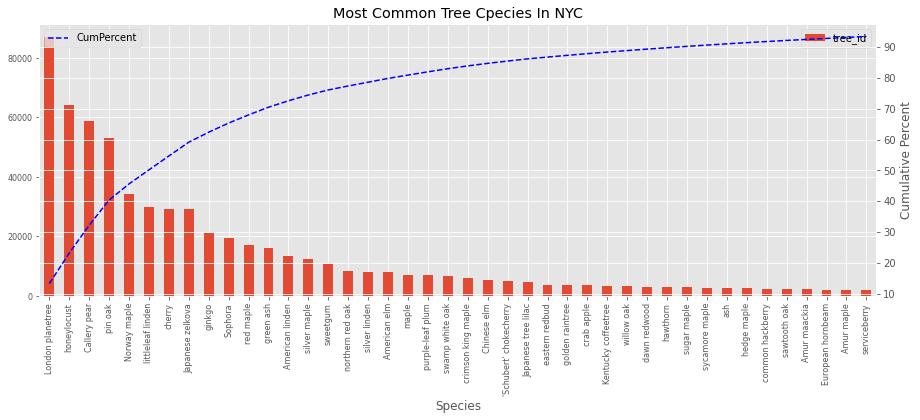

In [9]:
grouped=df.groupby('spc_common')['tree_id'].count().reset_index().sort_values('tree_id',ascending=False)
grouped['CumPercent']=(grouped['tree_id']/grouped['tree_id'].sum()*100).cumsum()
ax=grouped.query('tree_id>2000').plot(figsize=(15,5),kind='bar',x='spc_common',y='tree_id',fontsize=8,rot=90)
ax.set_title('Most Common Tree Cpecies In NYC')
ax.set_xlabel('Species')
ax2=ax.twinx()
grouped.query('tree_id>2000').plot(ax=ax2,kind='line',x='spc_common',y='CumPercent',color='b',ls='--')
ax2.set_ylabel('Cumulative Percent')
plt.show()

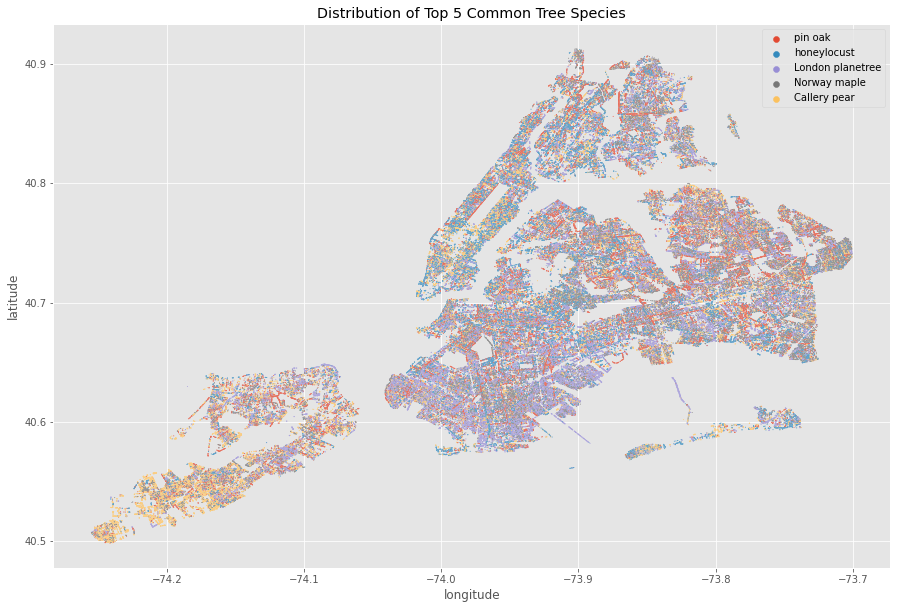

In [10]:
top5species=grouped['spc_common'][:5]
filtered=df.query('spc_common.isin(@top5species)')

plt.figure(figsize=(15,10))
sns.scatterplot(data=filtered,x='longitude',y='latitude',hue='spc_common',s=1)
plt.title('Distribution of Top 5 Common Tree Species')
plt.legend()
plt.show()

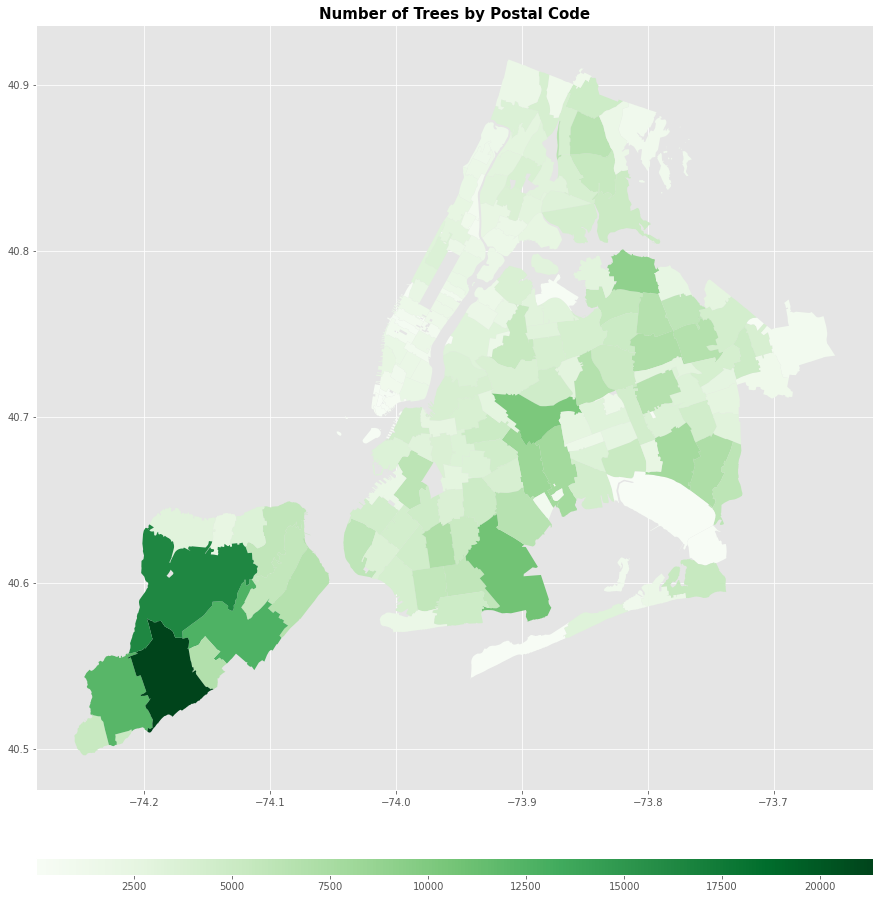

In [11]:
grouped=df.groupby('postcode')['spc_common'].count().reset_index()
grouped=grouped.merge(zips[['GEOID10','geometry']],left_on='postcode',right_on='GEOID10')
grouped=geopandas.GeoDataFrame(grouped)

fig,ax=plt.subplots(figsize=(15,25))
grouped.plot(ax=ax,column='spc_common',legend=True,cmap='Greens',legend_kwds={'orientation':'horizontal','pad':0.05,'aspect':50})
plt.title('Number of Trees by Postal Code',size=15,fontweight='bold')
plt.show()

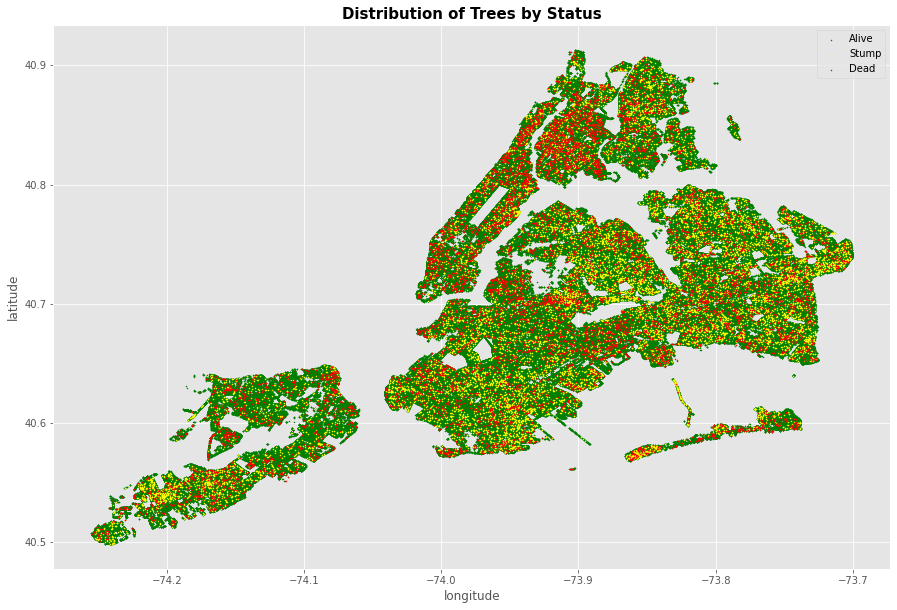

Alive    95.38 %
Stump     2.58 %
Dead      2.04 %
Name: status, dtype: object


In [15]:
fig,ax=plt.subplots(figsize=(15,10))
df.query('status=="Alive"').plot(ax=ax,kind='scatter',x='longitude',y='latitude',s=1,c='green',label='Alive')
df.query('status=="Stump"').plot(ax=ax,kind='scatter',x='longitude',y='latitude',s=1,c='yellow',label='Stump')
df.query('status=="Dead"').plot(ax=ax,kind='scatter',x='longitude',y='latitude',s=1,c='red',label='Dead')
plt.title('Distribution of Trees by Status',size=15,fontweight='bold')
plt.legend()
plt.show()

print((df['status'].value_counts(normalize=True)*100).round(2).astype(str)+' %')

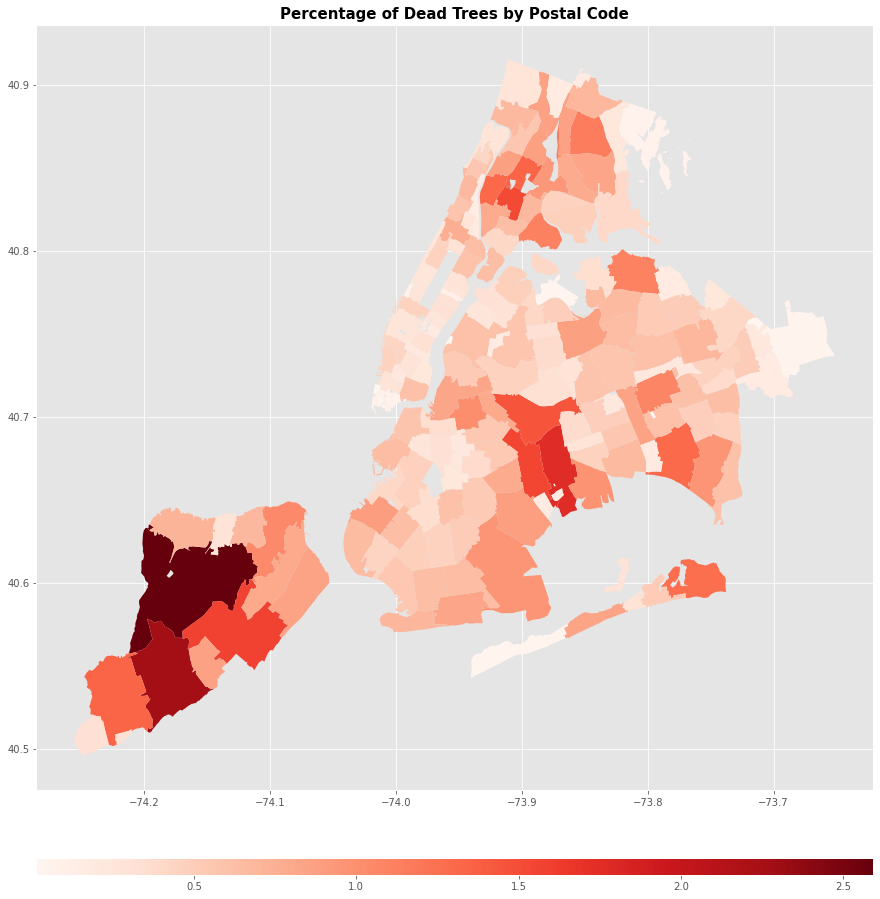

In [13]:
grouped=df.query('status=="Dead"').groupby('postcode')['tree_id'].count().reset_index().sort_values('tree_id',ascending=False)
grouped['percentage']=(grouped['tree_id']/grouped['tree_id'].sum()*100)
grouped=grouped.merge(zips[['GEOID10','geometry']],left_on='postcode',right_on='GEOID10')
grouped=geopandas.GeoDataFrame(grouped)

fig,ax=plt.subplots(figsize=(15,25))
grouped.plot(ax=ax,column='percentage',legend=True,cmap='Reds',legend_kwds={'orientation':'horizontal','pad':0.05,'aspect':50})
plt.title('Percentage of Dead Trees by Postal Code',size=15,fontweight='bold')
plt.show()

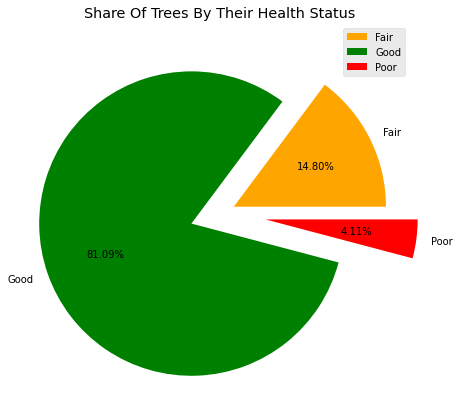

In [39]:
df.groupby('health')['tree_id'].count().reset_index()\
.plot(figsize=(7,7),kind='pie',y='tree_id',labels=['Fair','Good','Poor'],
      title='Share Of Trees By Their Health Status',autopct='%.2f%%',
     explode=[0.1,0.2,0.3],label='',colors=['orange','green','red'])
plt.show()